In [64]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, RepeatVector,TimeDistributed, Dense

            Robberies
Month                
1966-01-01         41
1966-02-01         39
1966-03-01         50
1966-04-01         40
1966-05-01         43


<Axes: xlabel='Month'>

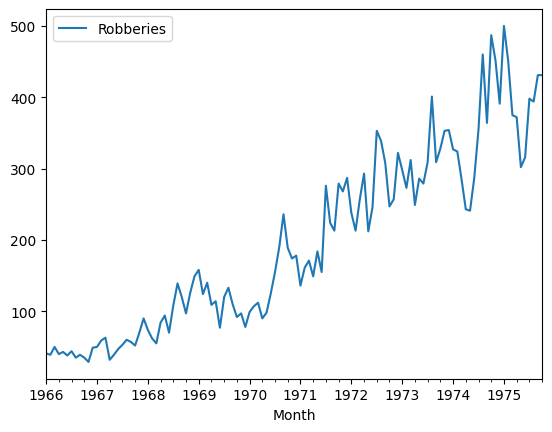

In [65]:

df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-robberies.csv")
df["Month"] = pd.to_datetime(df["Month"])
df = df.set_index("Month")
print(df.head())
df.plot()

In [66]:
max_value = max(df['Robberies'])
min_value = min(df['Robberies'])

def normalize_data(data):
    return (data - min_value) / (max_value - min_value)

def denormalize_data(data):
    return data * (max_value - min_value) + min_value

normalized_df = normalize_data(df['Robberies'])

n_features = 1
n_future = 20
n_past = 40

x = []
for i in range(len(normalized_df) - n_past + 1 - n_future):
    window = normalized_df.iloc[i:i+n_past].to_numpy().reshape(-1, 1)
    x.append(window)
x = np.array(x)

y = []
for i in range(n_future, len(normalized_df) - n_past + 1):
    window = normalized_df.iloc[i:i+n_future].to_numpy().reshape(-1, 1)
    y.append(window)
y = np.array(y)

train_size = 0.8
validation_size = 0.1
test_size = 0.1

indices = np.arange(min(len(x),len(y)))
np.random.shuffle(indices)
train_index = int(train_size * len(indices))
val_index = int((train_size + validation_size) * len(indices))

train_indices = indices[:train_index]
val_indices = indices[train_index:val_index]
test_indices = indices[val_index:]

x_train, y_train = x[train_indices], y[train_indices]
x_val, y_val = x[val_indices], y[val_indices]
x_test, y_test = x[test_indices], y[test_indices]

print("Number of samples in training set:", len(x_train))
print("Number of samples in validation set:", len(x_val))
print("Number of samples in test set:", len(x_test))

print(x_train.shape[0],x_train.shape[1],x_train.shape[2])
print(x_test.shape[0],x_test.shape[1],x_test.shape[2])
print(x_val.shape[0],x_val.shape[1],x_val.shape[2])

print(y_train.shape[0],y_train.shape[1],y_train.shape[2])
print(y_test.shape[0],y_test.shape[1],y_test.shape[2])
print(y_val.shape[0],y_val.shape[1],y_val.shape[2])

Number of samples in training set: 47
Number of samples in validation set: 6
Number of samples in test set: 6
47 40 1
6 40 1
6 40 1
47 20 1
6 20 1
6 20 1


In [69]:
batch_size = 5
epochs = 100
hidden_layer = 128

model = Sequential()
model.add(LSTM(hidden_layer, activation='relu', input_shape=(n_past, n_features)))
model.add(RepeatVector(n_future))
model.add(LSTM(hidden_layer, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
model.summary()

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Time')
plt.legend()
plt.show()

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Input 0 of layer "repeat_vector_11" is incompatible with the layer: expected ndim=2, found ndim=3. Full shape received: (None, 40, 128)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step
40 20 1


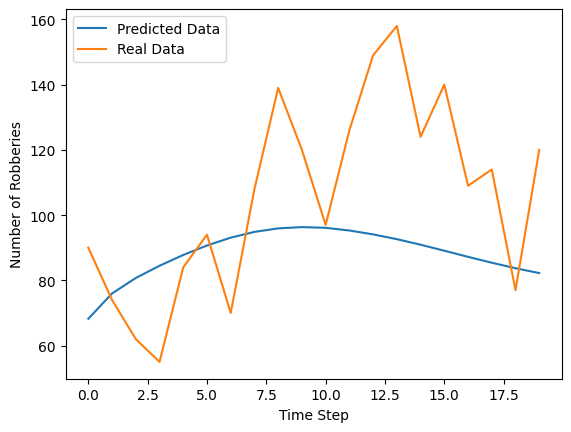

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
40 20 1


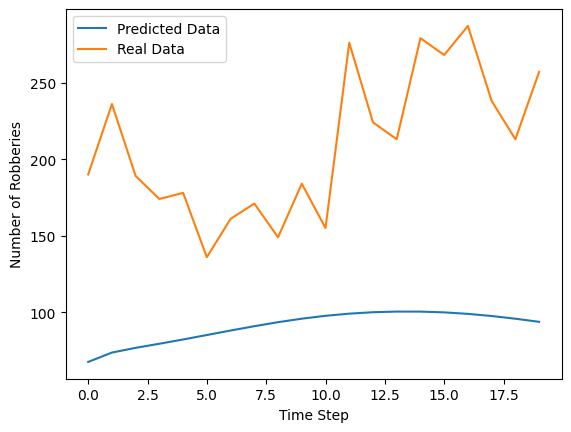

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
40 20 1


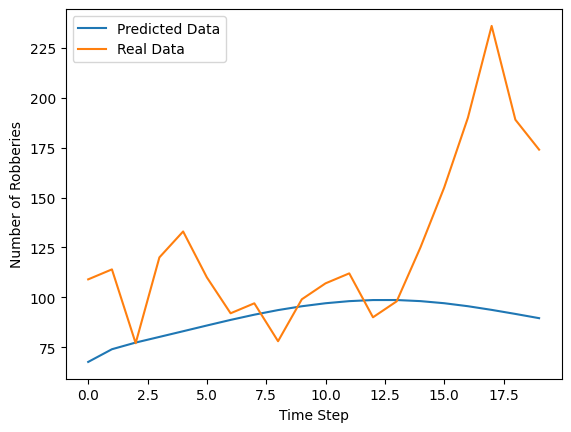

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
40 20 1


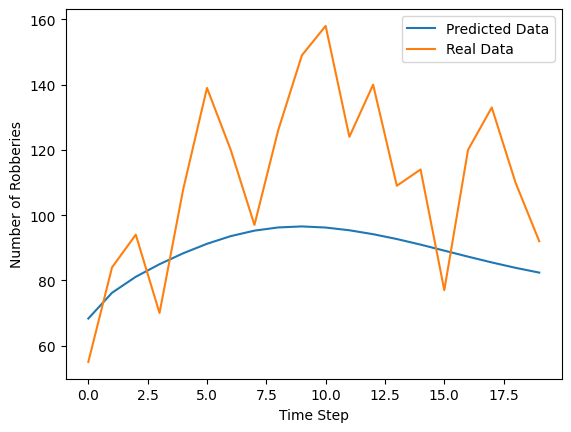

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
40 20 1


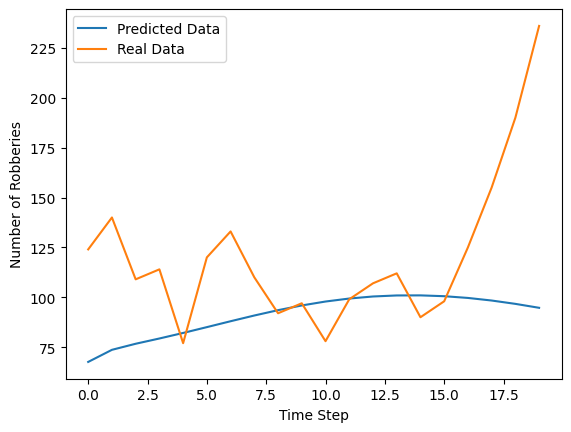

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
40 20 1


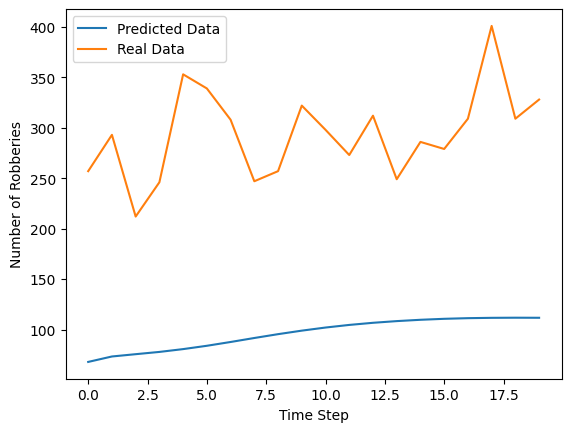

In [68]:
for i, x in enumerate(x_val):
    predicted = denormalize_data(model.predict(x))
    print(predicted.shape[0], predicted.shape[1], predicted.shape[2])
    real = denormalize_data(y_val[i].flatten())
    plt.plot(predicted[n_future - 1], label='Predicted Data')
    plt.plot(real, label='Real Data')
    plt.xlabel('Time Step')
    plt.ylabel('Number of Robberies')
    plt.legend()
    plt.show()